## **Importing basic libraries**

In [ ]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
# get data file names
path =r'/content/drive/MyDrive/Feature Collections/Complete Datasets'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
data = pd.concat(dfs, ignore_index=True)
#data = data.sort_values(by = 'Date')

data

,Unnamed: 0,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
0,5293,6081,0.845437,260.770065,1.067915e+07,0.000348,0.000387,0.000000
1,5534,4928,0.873970,260.115461,1.327641e+07,0.009671,0.009987,0.000000
2,5899,4864,0.814324,270.641063,6.644732e+06,0.039129,0.041133,0.000000
3,3115,5907,0.842371,267.510780,8.744864e+06,0.008937,0.009486,0.000000
4,1687,6081,0.830799,257.111546,1.221229e+07,0.000695,0.000751,0.000000
...,...,...,...,...,...,...,...,...
9189,7574,1582,0.227713,280.016113,6.844714e+06,0.033226,0.034696,0.067538
9190,7578,5820,0.852102,267.419759,1.144651e+07,0.005592,0.005664,0.000691
9191,7585,4389,0.724032,272.730062,9.400027e+06,0.017384,0.018264,0.088259
9192,7589,5240,0.858149,268.383138,1.237990e+07,0.013683,0.014308,0.006160


In [ ]:
# Total number of null values per column
data.isna().sum()

Unnamed: 0                           0
elevation                            0
forecast_albedo                      0
skin_temperature                     0
surface_solar_radiation_downwards    0
total_precipitation                  0
snow_acc                             0
snowmelt_calc                        0
dtype: int64

# Normalization


In [ ]:
dt = data
dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] = (dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())/(dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].max() - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())
dt.head()

,Unnamed: 0,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
0,5293,0.993157,0.845437,0.493550,0.374889,0.000348,0.000387,0.0
1,5534,0.738631,0.873970,0.478903,0.505788,0.009671,0.009987,0.0
2,5899,0.724503,0.814324,0.714407,0.171559,0.039129,0.041133,0.0
3,3115,0.954746,0.842371,0.644369,0.277403,0.008937,0.009486,0.0
4,1687,0.993157,0.830799,0.411692,0.452157,0.000695,0.000751,0.0


In [ ]:
dt.forecast_albedo.value_counts()

0.850000    5
0.814330    5
0.814328    5
0.814333    5
0.814324    5
           ..
0.752306    1
0.695532    1
0.484595    1
0.705915    1
0.856419    1
Name: forecast_albedo, Length: 8767, dtype: int64

# Model training

In [ ]:
X = dt[['skin_temperature','forecast_albedo','elevation','surface_solar_radiation_downwards','total_precipitation','snow_acc']]
y = dt['snowmelt_calc']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
1859    0.000000
1638    0.175497
7766    0.000000
4145    0.000000
8684    0.050884
          ...   
694     0.021146
1342    0.073349
6974    0.000007
2442    0.060928
7663    0.000000
Name: snowmelt_calc, Length: 6435, dtype: float64
1107    0.029271
6048    0.000000
8562    0.085920
7248    0.103397
3456    0.057547
          ...   
62      0.000000
5261    0.025081
4860    0.005586
4559    0.035853
8150    0.026614
Name: snowmelt_calc, Length: 2759, dtype: float64


In [ ]:
train_X

,skin_temperature,forecast_albedo,elevation,surface_solar_radiation_downwards,total_precipitation,snow_acc
1859,0.476529,0.853415,0.824503,0.371388,0.002059,0.002190
1638,0.794642,0.507998,0.561369,0.475505,0.023025,0.025336
7766,0.367249,0.822398,0.899779,0.616131,0.001366,0.001416
4145,0.446453,0.862249,0.738631,0.352655,0.005152,0.005414
8684,0.517006,0.847703,0.935541,0.287797,0.000799,0.000811
...,...,...,...,...,...,...
694,0.848174,0.224425,0.661810,0.439972,0.003770,0.004064
1342,0.516889,0.832131,0.616556,0.701972,0.000426,0.000426
6974,0.625774,0.636772,0.564459,0.190592,0.030795,0.032471
2442,0.806193,0.504242,0.768433,0.400735,0.002658,0.002800


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
emp_df = pd.DataFrame()
sequential_layers = [[8,16,32,64,128],[16,32,48,64],[6,12,18,24],[10,15,20,25],[5,10]]

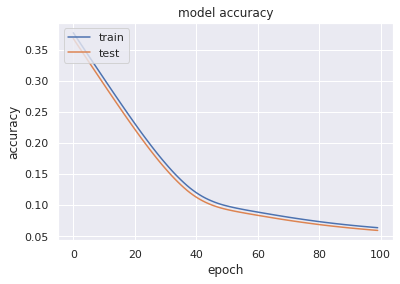

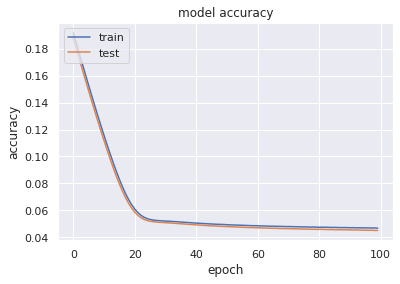

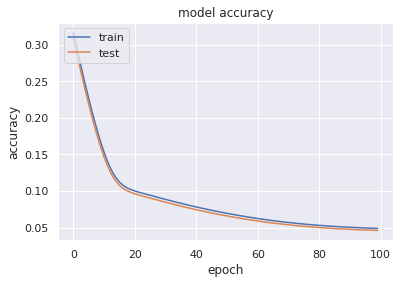

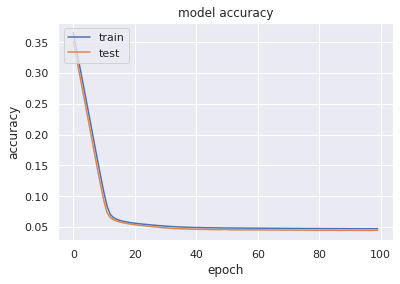

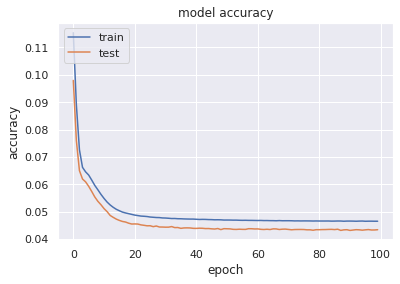

In [ ]:
for i in sequential_layers[0]:
  model = keras.Sequential([
  layers.Dense(i,activation=None, input_shape=[6]),
  layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
  layers.Dense(1,activation = 'linear')
  ])

  # Compile the model with the specified loss function.
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.000008),
                loss="mean_absolute_error",
                metrics=['RootMeanSquaredError'])
  # Fit the model
  history = model.fit(train_X, train_y, validation_split=0.33, epochs=100, verbose=0)
  emp_df = emp_df.append({'Layer nodes combination' : [i], 'RMSE' : history.history['root_mean_squared_error'][-1], 'Val_RMSE' : history.history['val_root_mean_squared_error'][-1]}, ignore_index = True)
  # plt.plot(history.history['root_mean_squared_error'])
  # plt.plot(history.history['val_root_mean_squared_error'])
  # plt.title('model accuracy')
  # plt.ylabel('accuracy')
  # plt.xlabel('epoch')
  # plt.legend(['train', 'test'], loc='upper left')
  # plt.show()

In [ ]:
emp_df.to_csv('/content/drive/MyDrive/Snowmelt estimation/check_new.csv')

In [ ]:
for i in sequential_layers[0]:
  for j in sequential_layers[1]:
    model = keras.Sequential([
    layers.Dense(i,activation=None, input_shape=[6]),
    layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Dense(j, activation=None),
    layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Dense(1,activation = 'linear')
    ])

    # Compile the model with the specified loss function.
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00008),
                  loss="mean_absolute_error",
                  metrics=['RootMeanSquaredError'])
    # Fit the model
    history = model.fit(train_X, train_y, validation_split=0.33, epochs=50, verbose=0)
    emp_df = emp_df.append({'Layer nodes combination' : [i,j], 'RMSE' : history.history['root_mean_squared_error'][-1], 'Val_RMSE' : history.history['val_root_mean_squared_error'][-1]}, ignore_index = True)

In [ ]:
emp_df.to_csv('/content/drive/MyDrive/Snowmelt estimation/check1.csv')

In [ ]:
for i in sequential_layers[0]:
  for j in sequential_layers[1]:
    for k in sequential_layers[2]:
      model = keras.Sequential([
      layers.Dense(i,activation=None, input_shape=[6]),
      layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
      layers.Dense(j, activation=None),
      layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
      layers.Dense(k, activation=None),
      layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
      layers.Dense(1,activation = 'linear')
      ])

      # Compile the model with the specified loss function.
      model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00008),
                    loss="mean_absolute_error",
                    metrics=['RootMeanSquaredError'])
      # Fit the model
      history = model.fit(train_X, train_y, validation_split=0.33, epochs=50, verbose=0)
      emp_df = emp_df.append({'Layer nodes combination' : [i,j,k], 'RMSE' : history.history['root_mean_squared_error'][-1], 'Val_RMSE' : history.history['val_root_mean_squared_error'][-1]}, ignore_index = True)

In [ ]:
emp_df.to_csv('/content/drive/MyDrive/Snowmelt estimation/check2.csv')

In [ ]:
for i in sequential_layers[0]:
  for j in sequential_layers[1]:
    for k in sequential_layers[2]:
      for l in sequential_layers[3]:
        model = keras.Sequential([
        layers.Dense(i,activation=None, input_shape=[6]),
        layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
        layers.Dense(j, activation=None),
        layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
        layers.Dense(k, activation=None),
        layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
        layers.Dense(l, activation=None),
        layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
        layers.Dense(1,activation = 'linear')
        ])

        # Compile the model with the specified loss function.
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00008),
                      loss="mean_absolute_error",
                      metrics=['RootMeanSquaredError'])
        # Fit the model
        history = model.fit(train_X, train_y, validation_split=0.33, epochs=50, verbose=0)
        emp_df = emp_df.append({'Layer nodes combination' : [i,j,k,l], 'RMSE' : history.history['root_mean_squared_error'][-1], 'Val_RMSE' : history.history['val_root_mean_squared_error'][-1]}, ignore_index = True)

In [ ]:
emp_df.to_csv('/content/drive/MyDrive/Snowmelt estimation/check3.csv')

In [ ]:
for i in sequential_layers[0]:
  for j in sequential_layers[1]:
    for k in sequential_layers[2]:
      for l in sequential_layers[3]:
        for m in sequential_layers[4]:
          model = keras.Sequential([
          layers.Dense(i,activation=None, input_shape=[6]),
          layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
          layers.Dense(j, activation=None),
          layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
          layers.Dense(k, activation=None),
          layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
          layers.Dense(l, activation=None),
          layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
          layers.Dense(m, activation=None),
          layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
          layers.Dense(1,activation = 'linear')
          ])

          # Compile the model with the specified loss function.
          model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00008),
                        loss="mean_absolute_error",
                        metrics=['RootMeanSquaredError'])
          # Fit the model
          history = model.fit(train_X, train_y, validation_split=0.33, epochs=50, verbose=0)
          emp_df = emp_df.append({'Layer nodes combination' : [i,j,k,l,m], 'RMSE' : history.history['root_mean_squared_error'][-1], 'Val_RMSE' : history.history['val_root_mean_squared_error'][-1]}, ignore_index = True)


In [ ]:
emp_df.to_csv('/content/drive/MyDrive/Snowmelt estimation/check4.csv')

In [ ]:
emp_df

,Layer nodes combination,RMSE,Val_RMSE
0,"[8, 16, 6, 10, 5]",0.054515,0.052040
1,"[8, 16, 6, 10, 10]",0.051135,0.048783
2,"[8, 16, 6, 15, 5]",0.052589,0.049905
3,"[8, 16, 6, 15, 10]",0.058338,0.055928
4,"[8, 16, 6, 20, 5]",0.052956,0.050555
...,...,...,...
635,"[128, 64, 24, 15, 10]",0.053012,0.050426
636,"[128, 64, 24, 20, 5]",0.049311,0.046791
637,"[128, 64, 24, 20, 10]",0.047892,0.045132
638,"[128, 64, 24, 25, 5]",0.053992,0.051432


In [ ]:
emp_df['RMSE']=emp_df['RMSE']/(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min())
emp_df['Val_RMSE']=emp_df['Val_RMSE']/(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min())
emp_df

,Layer nodes combination,RMSE,Val_RMSE
0,"[8, 16, 6, 10, 5]",0.147553,0.140855
1,"[8, 16, 6, 10, 10]",0.138407,0.132039
2,"[8, 16, 6, 15, 5]",0.142341,0.135078
3,"[8, 16, 6, 15, 10]",0.157903,0.151380
4,"[8, 16, 6, 20, 5]",0.143334,0.136836
...,...,...,...
635,"[128, 64, 24, 15, 10]",0.143485,0.136486
636,"[128, 64, 24, 20, 5]",0.133468,0.126648
637,"[128, 64, 24, 20, 10]",0.129628,0.122159
638,"[128, 64, 24, 25, 5]",0.146139,0.139211
